# Intro

This dataset contains 82,815 reviews from Amazon about cell phones from 2004 up until Sep 2019. Each review can be associated with an item and brand name and comes with a rating ranging from 1 to 5. This makes the dataset a perfect sample for text analytics and sentiment classification.

With multiple wordclouds and bar charts we found out that the two most popular brands are Apple and Samsung, and 96% iPhone offerings are renewed/refurbished models sold by carriers. Among all brands Xiaomi has the highest rating. Therefore we would deep dive into these three brands.

🍎 Since almost all iPhones sold on Amazon are refurbished phones sold by carriers, buyers are satisfied when their purchases are in a (nearly) new condition and would complain if they find any scratches on the screen or the battery health is bad.

𝙎 Samsung buyers are in general happy about the balance between quality and price. Their complaints are also mostly about battery and screen.


🌾 Xiaomi buyers show specific appreciation about camera and the price-quality ratio - they really believe it's a good deal! However, they also complain about battery problem and some users have troubles in making phone calls.

The project also includes a non-supervised sentiment classification using VADER in the end. There is a strong positive correlation between the sentiment and the rating, which shows that VADER model is actually a very powerful tool.

Upvote me if you like my solution! This means a lot for me and will keep me motivated for my next project!


In [1]:
import numpy as np 
import pandas as pd


In [2]:
# Step 0: Load datasets
items = pd.read_csv("./DataSets/Amazon Cell Phones Reviews Data/items.csv")
reviews = pd.read_csv("./DataSets/Amazon Cell Phones Reviews Data/reviews.csv")

In [3]:
# 0.1 Items overview
print("The dataset contains {0[0]: .0f} rows and {0[1]: .0f} variables.".format(items.shape))
items.head()

The dataset contains  720 rows and  10 variables.


,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [4]:
items.describe(include="all")

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
count,720,716,720,720,720,720.000000,720,720.000000,720.000000,720.000000
unique,720,10,718,720,679,NaN,720,NaN,NaN,NaN
top,B0000SX2UC,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/81yZOQEC+N...,NaN,https://www.amazon.com/product-reviews/B0000SX2UC,NaN,NaN,NaN
freq,1,346,2,1,3,NaN,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.713750,NaN,105.679167,234.948931,63.690778
std,NaN,NaN,NaN,NaN,NaN,0.716014,NaN,167.601101,200.008441,172.405370
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,3.300000,NaN,7.000000,97.512500,0.000000
50%,NaN,NaN,NaN,NaN,NaN,3.800000,NaN,32.000000,188.975000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,4.100000,NaN,122.250000,336.725000,0.000000


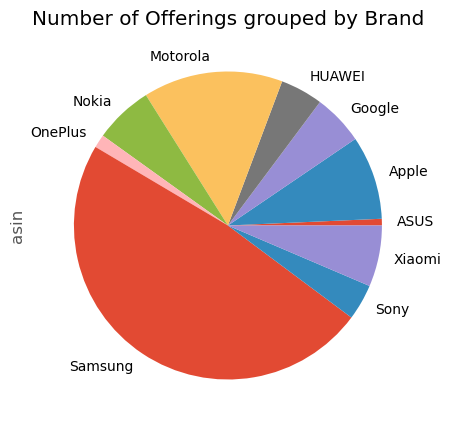

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
# Brand distribution
ax = items.groupby("brand").count()["asin"].plot(kind="pie", 
                                                 figsize=(8, 5),
                                                 title="Number of Offerings grouped by Brand")
plt.show()

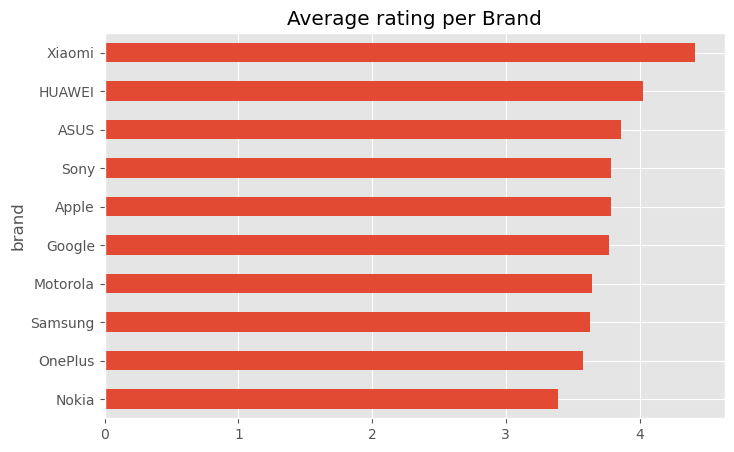

In [6]:
# Average rating per brand
ax = items.groupby("brand").mean()["rating"].sort_values().plot(kind="barh",
                                                                figsize=(8,5), 
                                                                title="Average rating per Brand")
plt.show()

In [7]:
# 0.2 Reviews overview
print("The dataset contains {0[0]: ,.0f} rows and {0[1]: .0f} variables.".format(reviews.shape))
reviews.head()

The dataset contains  67,986 rows and  8 variables.


,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [8]:
# 0.4 Link review data to item data bsed on common column "asin"
reviews = pd.merge(reviews, items, how="left", left_on="asin", right_on="asin")

In [9]:
# 0.5 Rename columns
reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0


In [10]:
# 0.6 Convert string into datetime
from datetime import datetime
reviews["date"] = reviews["date"].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
reviews["date"].head()

0   2005-10-11
1   2004-01-07
2   2003-12-30
3   2004-03-18
4   2005-08-28
Name: date, dtype: datetime64[ns]

In [11]:
# 0.7 Truncate date column to month
reviews["month"] = reviews["date"].apply(lambda x: x.replace(day=1))
reviews["month"].head()

0   2005-10-01
1   2004-01-01
2   2003-12-01
3   2004-03-01
4   2005-08-01
Name: month, dtype: datetime64[ns]

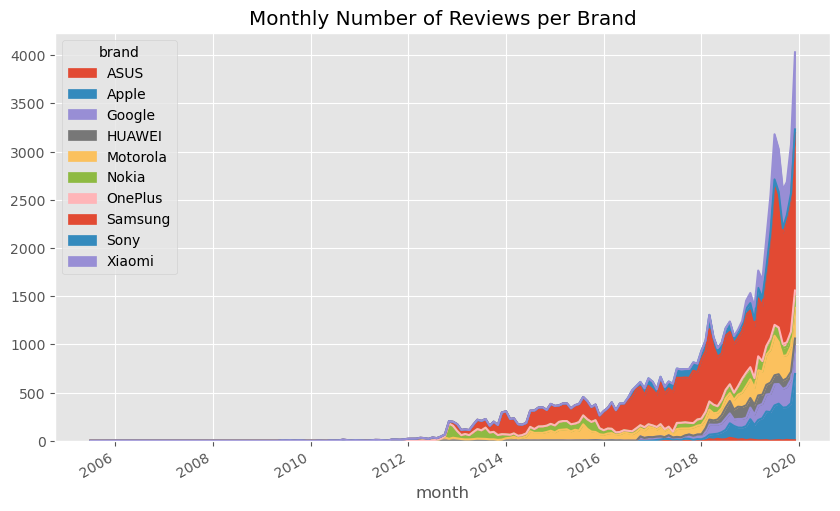

In [12]:
# 0.8 Plot reviews over time
ax = pd.pivot_table(reviews, 
                    index="month", 
                    columns="brand", 
                    values="asin", 
                    aggfunc="count", 
                    fill_value=0).plot.area(title="Monthly Number of Reviews per Brand", figsize=(10, 6))

Samsung and Apple are most rated brands, while Xiaomi has the highest average rating. Hence we will look deep into these three brands later.

In [13]:
# 0.9 Add posivity label
reviews["positivity"] = reviews["rating"].apply(lambda x: 1 if x>3 else(0 if x==3 else -1))

# Text Cleaning

This section creates functions to clean text, which includes:
* Convert the text into lowercase
* Remove punctuation
* Remove stopwords (English, from nltk corpus)
* Remove other keywords like "phone" and brand name

In [20]:
# Inspect for missing values in brand column
reviews["brand"].isna().sum()

200

In [21]:
# drops rows that have missing values in brand column
reviews = reviews.dropna(subset=['brand'])
 
# Resetting the indices using df.reset_index()
reviews = reviews.reset_index(drop=True)

['motorola',
 'nokia',
 'samsung',
 'huawei',
 'sony',
 'apple',
 'google',
 'asus',
 'oneplus',
 'xiaomi',
 'phone']

In [23]:
# Step 1: Preprocess review text
# 1.1 Define preprocess function
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = reviews["brand"].apply(lambda x: x.lower()).unique().tolist()
keywords.append("phone")
lemma = WordNetLemmatizer()
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into list
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
    # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    # Lemmatisation
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)
clean_text("I love reading books.")

'love reading book'

In [24]:
# 1.2 Apply preprocess function to the dataframe
reviews["body"] = reviews["body"].astype("str")
reviews["clean_text"] = reviews["body"].apply(clean_text)

Let's have a look at first 5 cleaned reviews:

In [25]:
reviews["clean_text"].head().values

array(['buy service',
       'nextel nearly year started time last year i205 upgraded i265 one best phone ever service best ever problem making reciving call considering nextel give shot opinion best cell company',
       'got say easy use hear person talking fine problem dealing nextel',
       '1 star phone locked pay additional fee unlock',
       'product good used cell one project worked wonder definitely recommend anyone interested buying'],
      dtype=object)

# Word Cloud

Given the size of the dataset, we created wordclouds only for the latest 1000 positive and negative reviews for Apple, Samsung and Xiaomi separately. The wordclouds are based on the frequency of words.

In [26]:
# Step 2: Create a wordcloud
# 2.1 Define word frequency function
def word_freq_dict(text):
    # Convert text into word list
    wordList = text.split()
    # Generate word freq dictionary
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict
word_freq_dict("I love reading books. I love music.")

{'I': 2, 'love': 2, 'reading': 1, 'books.': 1, 'music.': 1}

In [27]:
# 2.2 Create brand subsets
apple = reviews[reviews["brand"]=="Apple"].sort_values(by=["date"], ascending=False)
samsung = reviews[reviews["brand"]=="Samsung"].sort_values(by=["date"], ascending=False)
xiaomi = reviews[reviews["brand"]=="Xiaomi"].sort_values(by=["date"], ascending=False)

In [28]:
# 2.3 Initializer
from wordcloud import WordCloud, ImageColorGenerator

# Define a function to create a wordcloud from dictionary of word frequency
def wordcloud_from_frequency(word_freq_dict, title, figure_size=(10, 6)):
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
# Define a function to plot top10 positive words and top10 negative words in a grouped bar plot (from dictionaries)
def topn_wordfreq_bar_both(pos_word_freq_dict, neg_word_freq_dict, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    # Transform positive word frequency into DF
    df_pos = pd.DataFrame.from_dict(pos_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_pos.columns = ["frequency"]
    df_pos["frequency"] = df_pos["frequency"] / pos_num_doc
    df_pos["label"] = "Positive"
    # Transform negative word frequency into DF
    df_neg = pd.DataFrame.from_dict(neg_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_neg.columns = ["frequency"]
    df_neg["frequency"] = df_neg["frequency"] / neg_num_doc
    df_neg["label"] = "Negative"
    # Append two dataframes
    df_append = df_pos.append(df_neg)
    df_append.reset_index(inplace=True)
    # Plot
    sns.catplot(x="index", y="frequency", hue="label", data=df_append, 
                kind="bar",
                palette=palette,
                height=height, aspect=aspect, 
                legend_out=False)
    plt.title(title)
    plt.show()

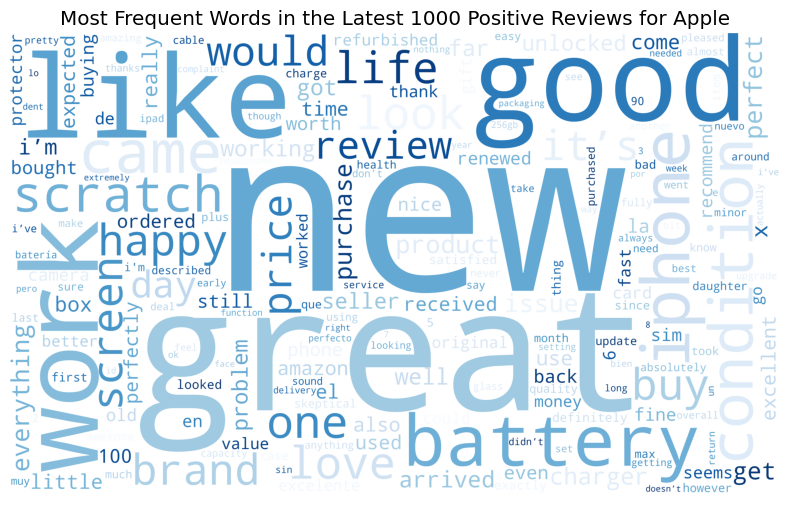

In [29]:
# 2.4 Plot wordclouds for latest 1000 reviews for Apple
apple_pos = " ".join(apple[apple["positivity"]==1]["clean_text"][0:1000])
apple_pos_word_freq = word_freq_dict(apple_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="white")
wordcloud_from_frequency(apple_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Apple")

If we check apple reviews that mention "new", they are most renewed phones - actually 96% of Apple reviews are for renewed iPhones that are sold on Amazon. Buyers are satisfied when they find their purchases are almost in the new condition.

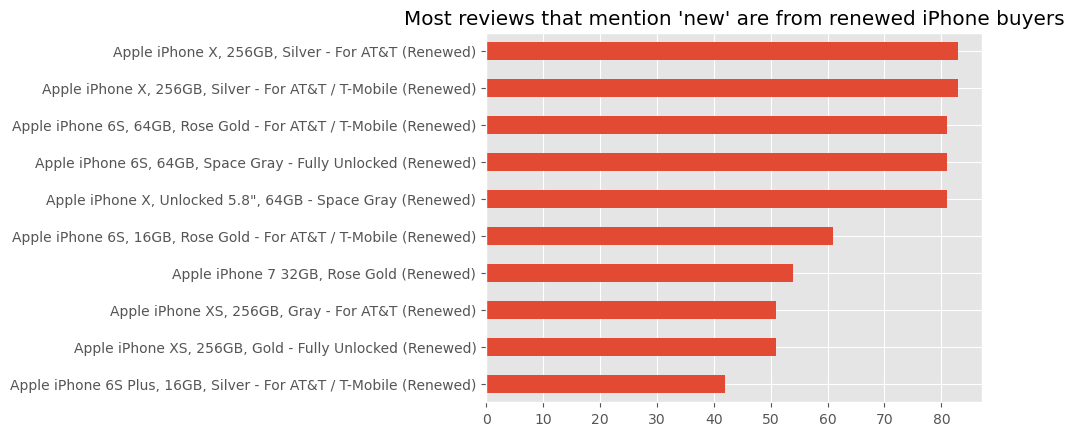

In [30]:
apple[apple["clean_text"].apply(lambda x: "new" in x)]["item_title"].value_counts().sort_values(ascending=True).tail(10).plot(kind="barh")
plt.title("Most reviews that mention 'new' are from renewed iPhone buyers")
plt.show()

In [31]:
apple["renewed"] = apple["item_title"].apply(lambda x: ("Renewed" in x) | ("Reburshied" in x))
print("{0: 0.1%} iPhones that were sold on Amazon are renewed/reburshied.".format(apple["renewed"].sum() / len(apple["renewed"])))

 100.0% iPhones that were sold on Amazon are renewed/reburshied.


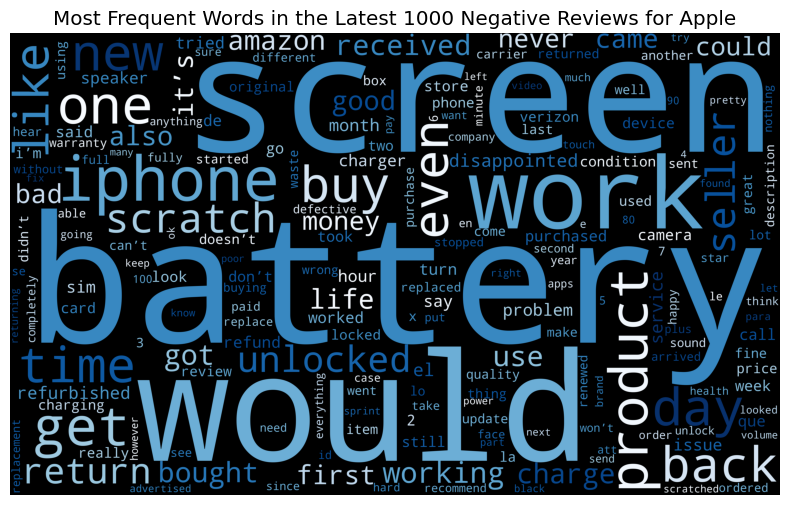

In [33]:
apple_neg = " ".join(apple[apple["positivity"]==-1]["clean_text"][0:1000])
apple_neg_word_freq = word_freq_dict(apple_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="black")
wordcloud_from_frequency(apple_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Apple")

C:\Users\USER\AppData\Local\Temp\ipykernel_15032\1935761668.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_pos.append(df_neg)


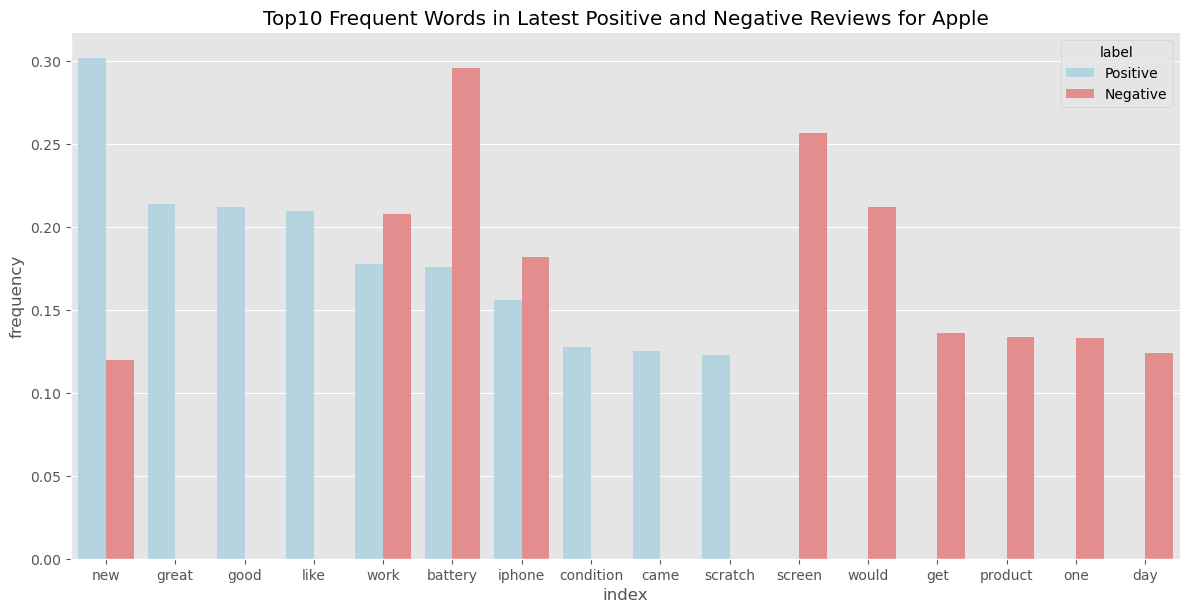

In [34]:
topn_wordfreq_bar_both(apple_pos_word_freq, apple_neg_word_freq, 
                       min(sum(apple["positivity"]==1), 1000), 
                       min(sum(apple["positivity"]==-1), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Apple", 
                       ["lightblue", "lightcoral"], 
                       height=6, aspect=2)

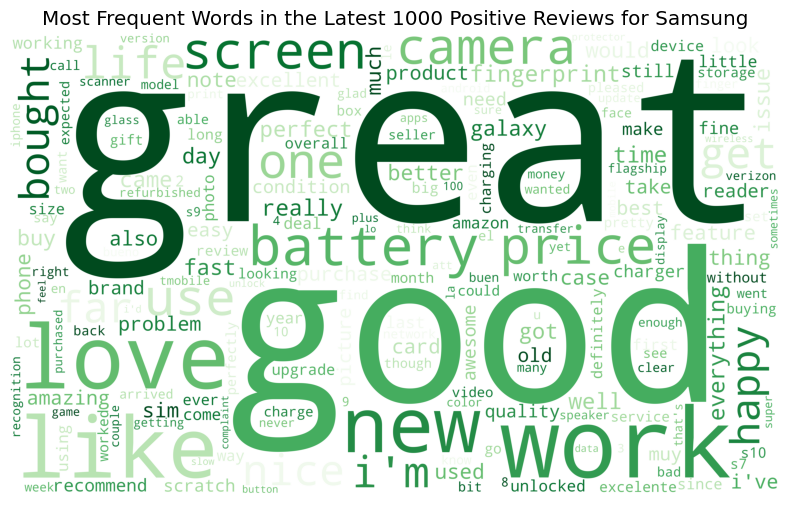

In [35]:
# 2.5 Plot wordclouds for latest 1000 reviews for Samsung
samsung_pos = " ".join(samsung[samsung["positivity"]==1]["clean_text"][0:1000])
samsung_pos_word_freq = word_freq_dict(samsung_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Greens",
                      background_color="white")
wordcloud_from_frequency(samsung_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Samsung")

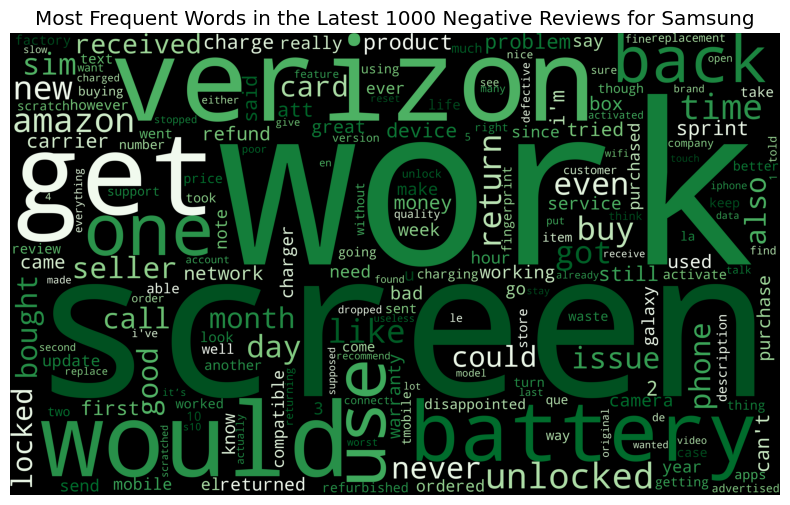

In [36]:
samsung_neg = " ".join(samsung[samsung["positivity"]==-1]["clean_text"][0:1000])
samsung_neg_word_freq = word_freq_dict(samsung_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Greens",
                      background_color="black")
wordcloud_from_frequency(samsung_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Samsung")

C:\Users\USER\AppData\Local\Temp\ipykernel_15032\1935761668.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_pos.append(df_neg)


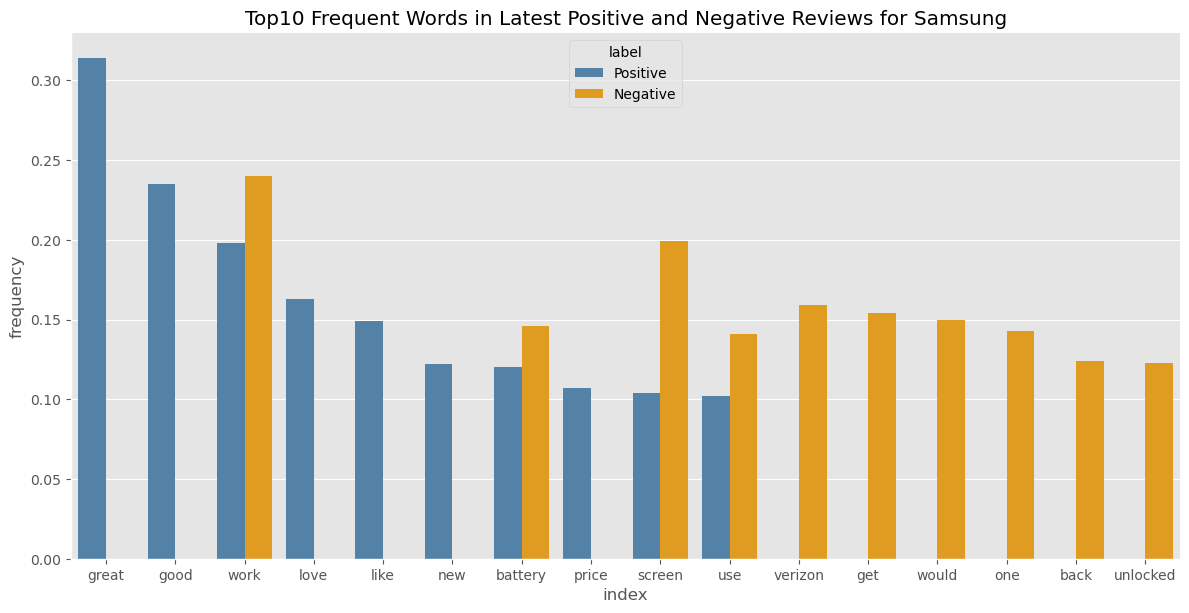

In [37]:
topn_wordfreq_bar_both(samsung_pos_word_freq, samsung_neg_word_freq, 
                       min(sum(samsung["positivity"]==1), 1000), 
                       min(sum(samsung["positivity"]==-1), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Samsung", 
                       ["steelblue", "orange"], 
                       height=6, aspect=2)

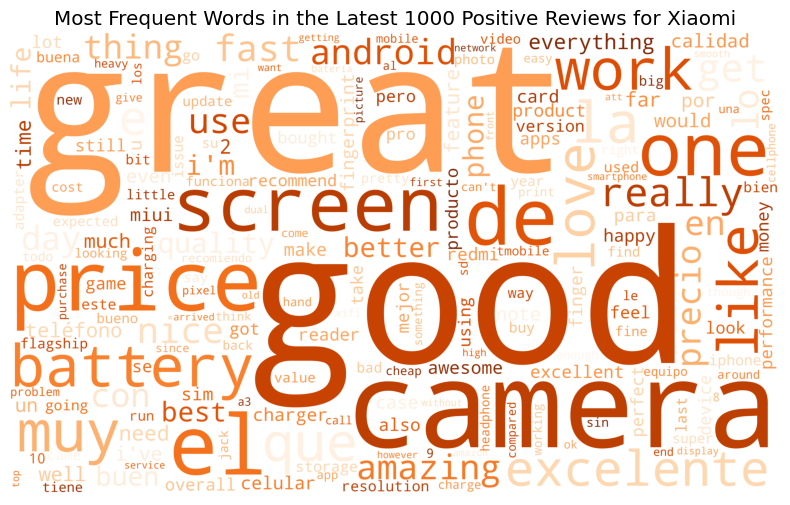

In [38]:
# 2.6 Plot wordclouds for latest 1000 reviews for Xiaomi
xiaomi_pos = " ".join(xiaomi[xiaomi["positivity"]==1]["clean_text"][0:1000])
xiaomi_pos_word_freq = word_freq_dict(xiaomi_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Oranges",
                      background_color="white")
wordcloud_from_frequency(xiaomi_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Xiaomi")

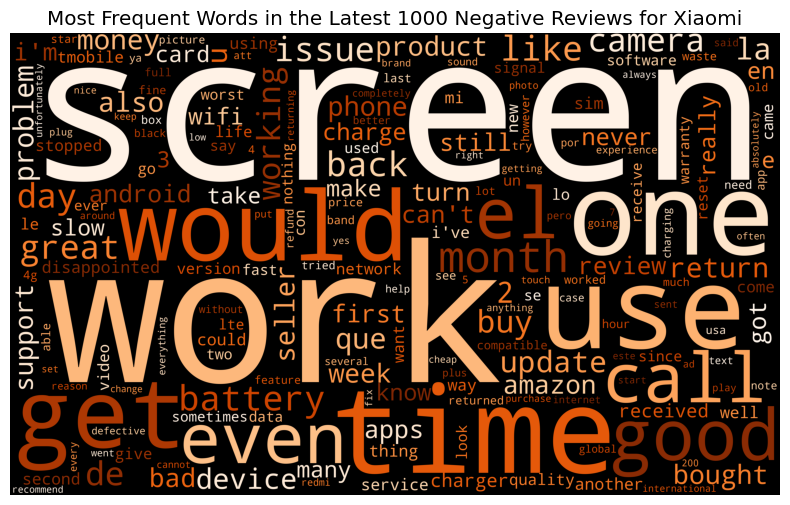

In [39]:
xiaomi_neg = " ".join(xiaomi[xiaomi["positivity"]==-1]["clean_text"][0:1000])
xiaomi_neg_word_freq = word_freq_dict(xiaomi_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Oranges",
                      background_color="black")
wordcloud_from_frequency(xiaomi_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Xiaomi")

C:\Users\USER\AppData\Local\Temp\ipykernel_15032\1935761668.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_pos.append(df_neg)


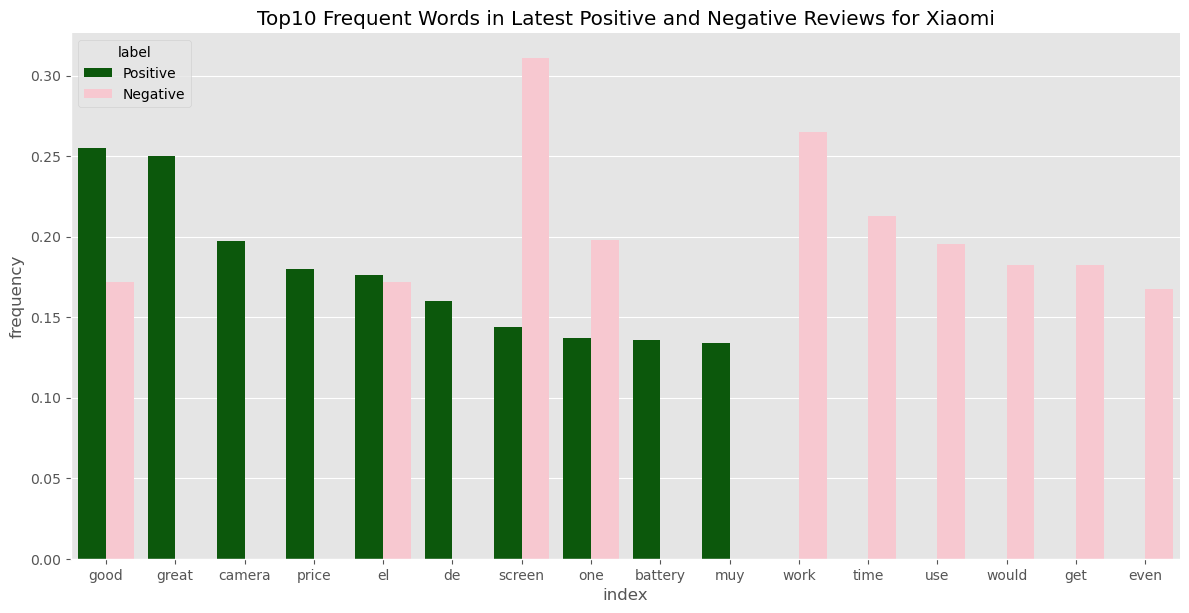

In [40]:
topn_wordfreq_bar_both(xiaomi_pos_word_freq, xiaomi_neg_word_freq, 
                       min(sum(xiaomi["positivity"]==1), 1000), 
                       min(sum(xiaomi["positivity"]==-1), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Xiaomi", 
                       ["darkgreen", "pink"], 
                       height=6, aspect=2)

The visulisations above show that:
* The top topics that cell phone buyers focus on are battery health and screen condition.
* Most iPhones that are sold on Amazon are renewed/refurbished. Apple buyers are satisfied if their purchases are in a (nearly) new condition, and would complain mostly when there is scratch on the screen or the battery health is bad.
* Samsung buyers are in general positive about the overall performance of their purchases, but also complained about the screen. Some buyers also complained about unlocked phones sold by carriers.
* Xiaomi buyers show specific appreciation for the good price and camera, and complained about the screen and making phone calls. Some buyers also have troubles when making phone calls.

# Vectorization and Topic Modelling

To extract features from each text, we need to convet the original text into a document-term matrix (https://en.wikipedia.org/wiki/Document-term_matrix), where the feature names are words and values are the scaled frequency of the words in each document.

Why "scaled frequency"? If we simply count the occurence of each word in each document, the highly frequent words start to dominate yet those words may not contain that much "informational" content (e.g. "the"). Therefore we use TF-IDF model to rescale the word frequency.
* Term frequency: the frequency of a certain word in a document
* Inverse document frequency: the scoring of how rare a certain word in all documents

In [41]:
# Step 3: Vectorization and Topic Modelling
# 3.1 Initialize TF-IDF vectorizer
import time
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.05, stop_words="english")

For topic modelling we employ LDA model. 

In [42]:
# 3.2 Initalize LDA model
from sklearn.decomposition import LatentDirichletAllocation
n_topics=10
lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=50, 
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [43]:
# 3.3 Define a function to print LDA topics
def print_topn_words(model, feature_names, topn):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-topn - 1:-1]])
        print(message)
    print()

In [44]:
# 3.4 Run LDA model for Apple
t0 = time.time()
apple_tfidf = tfidf_vectorizer.fit_transform(apple["clean_text"])
apple_tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(apple_tfidf)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for Apple.".format(n_topics))
print_topn_words(lda, apple_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Below is the output from LDA model with 10 topics (each includes Top10 words) for Apple.
Topic #0: like new look brand work came scratch battery happy buy
Topic #1: problem working day got refurbished iphone work screen time seller
Topic #2: iphone bought use buy refurbished new got purchase work day
Topic #3: charger time came work good got screen great scratch like
Topic #4: great price issue review got use day scratch battery like
Topic #5: product far good great working work new scratch buy came
Topic #6: screen scratch seller purchase happy battery new came review iphone
Topic #7: love work unlocked great bought scratch use iphone day new
Topic #8: good battery life scratch work new iphone day came great
Topic #9: condition perfect came great work scratch new iphone good battery

Done in 16.451s.


The LDA topic modelling confirms our findings from the wordcloud:
* Apple buyers complain about battery life.
* If the buyer bought a refurbished iphone, he would pay particular attention to batter health and screen condition.

In [45]:
# Run the model for Samsung
t0 = time.time()
samsung_tfidf = tfidf_vectorizer.fit_transform(samsung["clean_text"])
samsung_tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(samsung_tfidf)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for Samsung.".format(n_topics))
print_topn_words(lda, samsung_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

Below is the output from LDA model with 10 topics (each includes Top10 words) for Samsung.
Topic #0: new issue galaxy ve like note work time phone screen
Topic #1: product like buy new good great time phone work day
Topic #2: great note price better work love use new screen buy
Topic #3: battery life need used great day screen use good camera
Topic #4: good price got better great new work camera like use
Topic #5: work bought phone great new use got like time good
Topic #6: love sim card new work use got came great need
Topic #7: screen verizon really like use note work time got phone
Topic #8: fast came far camera great good new work screen love
Topic #9: use problem time month day got screen phone bought work

Done in 107.786s.


Samsung buyers are in general happy about the value-price combination. They also complained abbout battery life and screen condition.

In [46]:
# Run the model for Xiaomi
t0 = time.time()
xiaomi_tfidf = tfidf_vectorizer.fit_transform(xiaomi["clean_text"])
xiaomi_tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(xiaomi_tfidf)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for Xiaomi.".format(n_topics))
print_topn_words(lda, xiaomi_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

Below is the output from LDA model with 10 topics (each includes Top10 words) for Xiaomi.
Topic #0: screen amazing day better battery camera need great use price
Topic #1: money la en muy el excelente better mi great buy
Topic #2: best android phone ve fast like camera using really feature
Topic #3: work like time issue bought using thing great use buy
Topic #4: nice battery fast good really camera life great feature price
Topic #5: great price far camera work fast like quality good screen
Topic #6: el que lo la muy en excelente mi android use
Topic #7: love muy buy great thing bought screen using price quality
Topic #8: excelente quality camera great price good muy use need buy
Topic #9: good excellent mi use price fast camera screen quality work

Done in 15.800s.


Consistent with the wordcloud, Xiaomi buyers show highest satisfaction about the quality especially the camera.

# Feature Importance for Sentiment Classification

The document-term matrix we obtain fter running text vectorization can be used as a feature set. In the following example, we use it as the features to predict 

In [47]:
# Step 4: Plot feature importance using XGBoost
# 4.1 for Apple
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(apple_tfidf, apple["positivity"])
featureImport = pd.DataFrame(xgb_clf.feature_importances_, index=apple_tfidf_feature_names)
featureImport.columns = ["Importance"]
featureImport.sort_values(["Importance"], ascending=True).tail(20).plot(kind="barh", figsize=(10, 6))
plt.title("XGBoost Relative Feature Importance (from all reviews for Apple)")
plt.show()

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [-1  0  1]

# Sentiment Analysis using VADER

There are two common approaches for text sentiment analysis: the lexical method and the machine learning methhod.

The lexcial method maps the new text to a pre-defined "dictionary of sentiment". VADER is one example of such method. Wtihe VADER, the sentiment score of a sentence is the normalised sum of sentiment scores of each word in that sentence.

The machine learning method is applied when an pre-labeled dataset is available and uses it as a training dataset to predict the sentiment of a new text. This is essentially a prediction/classification problem.

In [ ]:
# Step 1: Filter English reviews
# 1.1 Add language labels (This part can take ~15 minutes)
# from langdetect import detect
# def lang_detect(text):
#     try:
#         return detect(text)
#     except:
#         return None
# import time
# start_time = time.time()
# reviews["lang"] = reviews["body"].apply(lang_detect)
# print("It takes %s seconds for the code to finish." % (time.time() - start_time))

In [ ]:
# 1.2 Plot distribution of reviews into languages
# reviews["lang"].value_counts()[:10].plot(kind="barh", title="Number of Reviews grouped by Top10 Language")
# plt.show()

In [ ]:
# 1.3 Only take English reviews
# reviews = reviews[reviews["lang"]=="en"]

In [ ]:
# Step 2: Sentiment analysis using Vader
# 2.1 Load packages
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# analyzer = SentimentIntensityAnalyzer()
# analyzer.polarity_scores("The weather is nice today.")

In [ ]:
# 2.2 Create sentiment score columns (It takes roughly 5 minutes)
# start_time = time.time()
# reviews["body"] = reviews["body"].astype("str")
# reviews["sent_neg"] = reviews["body"].apply(lambda x: analyzer.polarity_scores(x)["neg"])
# reviews["sent_neu"] = reviews["body"].apply(lambda x: analyzer.polarity_scores(x)["neu"])
# reviews["sent_pos"] = reviews["body"].apply(lambda x: analyzer.polarity_scores(x)["pos"])
# reviews["sent_comp"] = reviews["body"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
# print("It takes %s seconds for the code to finish." % (time.time() - start_time))

In [ ]:
# 2.3 Save the datasets into csv
# reviews.to_csv("reviews_with_sentiment_scores.csv")

In [ ]:
# After the steps above we will get a pre-proceessed dataset
reviews_en = pd.read_csv("/kaggle/input/amazon-cell-phones-reviews-with-sentiment-scores/reviews_with_sentiment_scores.csv")

In [ ]:
# 2.4 Plot the distribution of sentiment scores
plt.figure()

plt.subplot(2, 2, 1)
reviews_en["sent_neg"].hist(figsize=(10, 8), color="lightblue")
plt.title("Negative Sentiment Score")
plt.subplot(2, 2, 2)
reviews_en["sent_neu"].hist(figsize=(10, 8), color="grey")
plt.title("Neutral Sentiment Score")
plt.subplot(2, 2, 3)
reviews_en["sent_pos"].hist(figsize=(10, 8), color="lightgreen")
plt.title("Positive Sentiment Score")
plt.subplot(2, 2, 4)
reviews_en["sent_comp"].hist(figsize=(10, 8), color="lightcoral")
plt.title("Compound Sentiment Score")

plt.suptitle('Sentiment Analysis of Amazom Cell Phone Reviews', fontsize=12, fontweight='bold');

plt.show()

The charts show that the majority of the reviews are positive (i.e. compoung score > 0). 

In [ ]:
# 2.5 Check the correlation between sentiment score (compound) and rating
import numpy as np
import scipy.stats as stats
print("The correlation coefficient between sentiment score (compound) and rating is {0[0]: .4f} with a p-value of {0[1]: .4f}.".format(stats.pearsonr(reviews_en["rating"], reviews_en["sent_comp"])))
reviews_en.groupby("rating").mean()["sent_comp"].plot(kind="bar", figsize=(10, 6))
plt.title("Avg. Sentiment Score (Compound) per Rating")
plt.show()

There is a strong correlation between the sentiment score derived by VADER and the actual rating from the reviewers. The VADER model proves to be a very powerful tool for sentiment classification.

# Appendix

Word frequency:
* https://programminghistorian.org/en/lessons/counting-frequencies

Sentiment anlaysis: 
* Python implementation of VADER: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
* VADER method explaind: http://datameetsmedia.com/vader-sentiment-analysis-explained/
* Documentation: https://github.com/cjhutto/vaderSentiment

Topic modelling: 
* TF-IDF model: https://machinelearningmastery.com/gentle-introduction-bag-words-model/
* Topic extraction with Non-negative Matrix Factorization and Latent Dirichlet Allocation: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

Sentiment classification:
* Feature extraction using TF-IDF: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform
* Classification: https://towardsdatascience.com/latent-semantic-analysis-sentiment-classification-with-python-5f657346f6a3